In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/ml_projects/ml_optimisation/"

Mounted at /content/gdrive


In [0]:
# enables inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# imports the required packages
from fastai.collab import *
from fastai.tabular import *
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
# defines the data directory
data_dir = Path(root_dir + '/data/')
data_dir

PosixPath('/content/gdrive/My Drive/ml_projects/ml_optimisation/data')

In [8]:
# reads in the papers with code model data
model_data = pd.read_csv(data_dir/'pw_code_model_data.csv')

model_data.head()

,dataset,extradata,global_rank,metric_name,metric_value,model,remove,task,paper,paper_path,paper_url
0,IC15,NaN,# 10,F-Measure,75.61%,SegLink,-,Scene Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...,NaN
1,SCUT-CTW1500,NaN,# 5,F-Measure,40.8%,SegLink,-,Curved Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...,NaN
2,SNLI,NaN,# 36,% Test Accuracy,84.6,300D NSE encoders,-,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders,NaN
3,SNLI,NaN,# 44,% Train Accuracy,86.2,300D NSE encoders,-,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders,NaN
4,SNLI,NaN,# 1,Parameters,3.0m,300D NSE encoders,-,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders,NaN


In [9]:
len(model_data)

5503

In [10]:
# lists the columns in the model_data dataframe
model_data.columns

Index(['dataset', 'extradata', 'global_rank', 'metric_name', 'metric_value',
       'model', 'remove', 'task', 'paper', 'paper_path', 'paper_url'],
      dtype='object')

## Data preprocessing

In [11]:
# remove all columns with NaN's
 model_data = model_data.dropna(axis=1, how='all')
  
 # drops the remove column
 model_data = model_data.drop('remove', 1)

# remove the hash from the global_rank column
model_data['global_rank'] = model_data['global_rank'].str.replace('#','')

# converts the global_rank column values to integers
model_data['global_rank'] = pd.to_numeric(model_data['global_rank'])

# remove rows where the metric_value is NaN
model_data = model_data.dropna(subset = ['metric_value'])

#
model_data = model_data[~model_data.metric_value.str.contains('-')]


len(model_data)

# model_data.head()

5425

In [12]:
# extracts the integer from the metric_value column
model_data['metric_value'] = model_data['metric_value'].str.extract('(\d+)').astype(int)

model_data.head()

,dataset,global_rank,metric_name,metric_value,model,task,paper,paper_path
0,IC15,10,F-Measure,75,SegLink,Scene Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...
1,SCUT-CTW1500,5,F-Measure,40,SegLink,Curved Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...
2,SNLI,36,% Test Accuracy,84,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders
3,SNLI,44,% Train Accuracy,86,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders
4,SNLI,1,Parameters,3,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders


## Generating training & test data

In [0]:
# generates training and test dataframes
train_df, test_df = train_test_split(model_data, test_size = 0.2)

train_df.head()

,dataset,global_rank,metric_name,metric_value,model,task,paper,paper_path
3498,TREC Robust04,7,MAP,0,FNRM-Rank_Embed,Ad-Hoc Information Retrieval,Neural Ranking Models with Weak Supervision,/paper/neural-ranking-models-with-weak-supervi...
3588,BUCC German-to-English,1,F1 score,96,Massively Multilingual Sentence Embeddings,Cross-Lingual Bitext Mining,Massively Multilingual Sentence Embeddings for...,/paper/massively-multilingual-sentence-embeddings
3418,Supervised:,7,Senseval 3,70,GAS<sub>ext</sub>,Word Sense Disambiguation,Incorporating Glosses into Neural Word Sense D...,/paper/incorporating-glosses-into-neural-word-...
1658,WikiText-2,13,Test perplexity,65,AWD-LSTM,Language Modelling,Regularizing and Optimizing LSTM Language Models,/paper/regularizing-and-optimizing-lstm-language
5205,Atari 2600 Asterix,10,Score,18919,DDQN+Pop-Art noop,Atari Games,Learning values across many orders of magnitude,/paper/learning-values-across-many-orders-of


In [0]:
# 20% train vs test split
len(train_df), len(test_df)

(4340, 1085)

In [0]:
# 
procs = [FillMissing, Categorify, Normalize]

In [0]:
# initialises an empty categorical vars
cat_vars = ['dataset', 'metric_name', 'task', 'paper', 'paper_path']

# initialises an empty continuous vars
cont_vars = ['global_rank', 'metric_value']

In [0]:
# dependent variable
dep_var = 'model'

# final dataframe
df_train = train_df[cat_vars + cont_vars + [dep_var]].copy()
# df_train = model_data[cat_vars + cont_vars + [dep_var]].copy()



# 
df_test = test_df[cat_vars + cont_vars].copy()

df_train.head()

,dataset,metric_name,task,paper,paper_path,global_rank,metric_value,model
3498,TREC Robust04,MAP,Ad-Hoc Information Retrieval,Neural Ranking Models with Weak Supervision,/paper/neural-ranking-models-with-weak-supervi...,7,0,FNRM-Rank_Embed
3588,BUCC German-to-English,F1 score,Cross-Lingual Bitext Mining,Massively Multilingual Sentence Embeddings for...,/paper/massively-multilingual-sentence-embeddings,1,96,Massively Multilingual Sentence Embeddings
3418,Supervised:,Senseval 3,Word Sense Disambiguation,Incorporating Glosses into Neural Word Sense D...,/paper/incorporating-glosses-into-neural-word-...,7,70,GAS<sub>ext</sub>
1658,WikiText-2,Test perplexity,Language Modelling,Regularizing and Optimizing LSTM Language Models,/paper/regularizing-and-optimizing-lstm-language,13,65,AWD-LSTM
5205,Atari 2600 Asterix,Score,Atari Games,Learning values across many orders of magnitude,/paper/learning-values-across-many-orders-of,10,18919,DDQN+Pop-Art noop


In [0]:
df_test.head()

,dataset,metric_name,task,paper,paper_path,global_rank,metric_value
2161,IWSLT2015 German-English,BLEU score,Machine Translation,A Convolutional Encoder Model for Neural Machi...,/paper/a-convolutional-encoder-model-for-neural,9,30
3407,Supervised:,Senseval 2,Word Sense Disambiguation,Incorporating Glosses into Neural Word Sense D...,/paper/incorporating-glosses-into-neural-word-...,5,72
1409,Atari 2600 Bank Heist,Score,Atari Games,Deep Reinforcement Learning with Double Q-lear...,/paper/deep-reinforcement-learning-with-double-q,9,1004
1916,Manga109 - 4x upscaling,SSIM,Image Super-Resolution,Enhanced Deep Residual Networks for Single Ima...,/paper/enhanced-deep-residual-networks-for-single,5,0
2509,Atari 2600 Seaquest,Score,Atari Games,Dueling Network Architectures for Deep Reinfor...,/paper/dueling-network-architectures-for-deep,2,50254


In [0]:
model_data.dtypes

dataset         object
global_rank      int64
metric_name     object
metric_value     int64
model           object
task            object
paper           object
paper_path      object
dtype: object

In [0]:
#
valid_idx = range(len(test_df))

valid_idx

range(0, 1000)

In [0]:
# databunch generation
data = (TabularList.from_df(df_train, path = data_dir, cat_names = cat_vars, cont_names = cont_vars, procs = procs)
                .split_by_idx(valid_idx)
                
                
                 # label_cls = FloatList informs fastai that this is a regression problem
                 # log due to RMSE 
                .label_from_df(cols = dep_var)
        
                .add_test(TabularList.from_df(df_test, path = data_dir, cat_names = cat_vars, cont_names = cont_vars, procs = procs))
                .databunch(bs = 64))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
MN-vc, Memory chains and semantic supervision, RetinaNet, MoE, ResNet-101...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [0]:
# displays 5 random rows from the databunch
data.show_batch(rows = 5)

dataset,metric_name,task,paper,paper_path,global_rank,metric_value,target
FIB-25 Synaptic Sites,VOI,Brain Image Segmentation,Large Scale Image Segmentation with Structured Loss based Deep Learning for Connectome Reconstruction,/paper/large-scale-image-segmentation-with,-0.5316,-0.1231,U-NET MALA
SemEvalCQA,[emailÂ protected],Question Answering,Attentive Pooling Networks,/paper/attentive-pooling-networks,-0.4667,-0.1232,AP-CNN
enwiki8,Bit per Character (BPC),Language Modelling,Multiplicative LSTM for sequence modelling,/paper/multiplicative-lstm-for-sequence-modelling,-0.1422,-0.1231,Large mLSTM
MSU-MFSD,Equal Error Rate,Face Anti-Spoofing,face anti-spoofing based on color texture analysis,/paper/face-anti-spoofing-based-on-color-texture,-0.4667,-0.1230,Color LBP
IC15,F-Measure,Scene Text Detection,R2CNN: Rotational Region CNN for Orientation Robust Scene Text Detection,/paper/r2cnn-rotational-region-cnn-for-orientation,-0.2071,-0.1215,R2CNN


In [0]:
## 

## Learner generation

In [0]:
#
learn = tabular_learner(data, layers=[100,50],
                        ps=[0.001, 0.01],
                        metrics = accuracy)

In [0]:
# describes the learner
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(547, 55)
    (1): Embedding(202, 31)
    (2): Embedding(195, 31)
    (3): Embedding(1100, 81)
    (4): Embedding(1103, 81)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=281, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=50, out_features=1407, bias=True)
  )
)

In [0]:
# finds the learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02


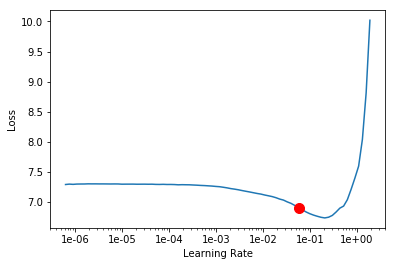

In [0]:
# 
learn.recorder.plot(suggestion = True)

In [0]:
#
learn.fit_one_cycle(1, 1E-02)

epoch,train_loss,valid_loss,accuracy,time
0,6.165376,5.624212,0.172727,00:00


In [0]:
learn.unfreeze()

In [0]:
# layers = [200, 100]

# learn.fit(5, 5.75E-02, wd = 1e-5) # 1.414172	

# learn.fit(5, 5.75E-02, wd = 1e-6)	# 1.254904

# learn.fit(5, 5.75E-02, wd = 1e-7) # 1.465490

# learn.fit(10, 5.75E-02, wd = 1e-6)	# 1.196803

# learn.fit(20, 5.75E-02, wd = 1e-6) # 1.463562	

# learn.fit(10, 1E-02, wd = 1e-6) # 0.983333 bs = 528

# learn.fit(10, 1E-02, wd = 1e-4) # 0.986658 acc = 0.69

# learn.fit(10, 1E-02, wd = 1e-3) # 0.950563	acc = 0.705955	

# learn.fit(10, 1E-02, wd = 1e-25) # 0.987219	acc = 0.710918 bs = 528

# learn.fit(30, 1E-02, wd = 1e-25) 1.324061 acc = 0.701299

# learn.fit(50, 1E-02, wd = 1e-25) 1.450469 acc =	0.694805

# learn.fit(20, 3E-02, wd = 1e-25) acc = 72

# learn.fit(10, 2E-02, wd = 1e-25) # 0.938083	acc = 0.714286

# learn.fit(9, 2E-02, wd = 1e-25) # 0.900491	acc = 0.693506

# learn.fit(10, 2E-02, wd = 1e-25) # 1.030821	acc = 0.706493	

# learn.fit(10, 3E-02, wd = 1e-25) # 1.187989	acc 0.716883

# learn.fit(10, 5E-02)  1.516435	acc = 0.696104

# learn.fit(10, 3E-02) # 1.187623	acc = 0.697403

# learn.fit(10, 2E-02) # 0.990174	acc = 0.693506 bs = 1024


# layers = [100, 50]

# learn.fit(10, 2E-02) # 0.922659	acc = 0.714286	

# learn.fit(10, 3E-02) # 0.913452	acc = 0.692208

# learn.fit(10, 4E-02) # 1.143893	acc = 0.700000	

# learn.fit(10, 5E-02) # 1.467127	acc = 0.698701


# layers = [100, 50] and bs = 64

# learn.fit(10, 2E-02) 1.099200	0.712987

# learn.fit(10, 3E-02) # 1.108957	acc = 0.716883	

learn.fit(10, 4E-02)	


epoch,train_loss,valid_loss,accuracy,time
0,5.713627,4.627436,0.261039,00:00
1,4.364858,2.691251,0.436364,00:00
2,3.156844,1.899277,0.583117,00:00
3,2.358676,1.499940,0.654545,00:00
4,1.786030,1.352579,0.654545,00:00
5,1.393903,1.358302,0.679221,00:00
6,1.163070,1.258310,0.712987,00:00
7,0.952814,1.246344,0.703896,00:00
8,0.837693,1.195248,0.707792,00:00
9,0.800703,1.248682,0.729870,00:00


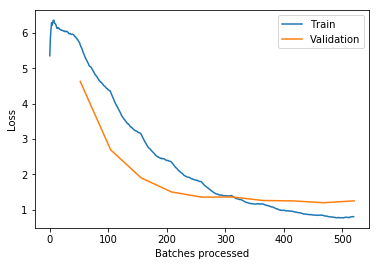

In [0]:
#
learn.recorder.plot_losses()

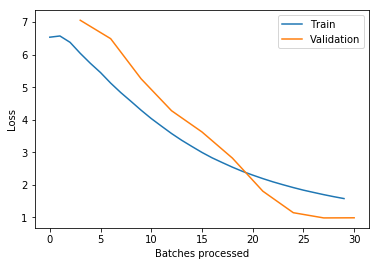

In [0]:
learn.recorder.plot_losses()

In [0]:
# 
learn.fit(10, 5.75E-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.173149,2.663569,0.637717,00:00
1,0.169891,2.596605,0.661290,00:00
2,0.175770,2.568470,0.645161,00:00
3,0.182826,2.501505,0.642680,00:00
4,0.191032,2.598322,0.658809,00:00
5,0.191650,2.612357,0.633995,00:00
6,0.191490,2.607853,0.656328,00:00
7,0.190645,2.710159,0.663772,00:00
8,0.194070,2.560730,0.650124,00:00
9,0.194626,2.598318,0.641439,00:00


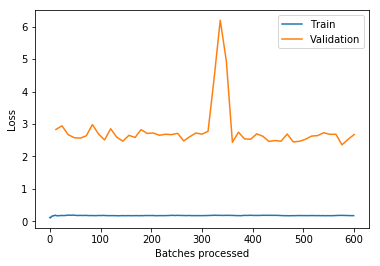

In [0]:
#
learn.recorder.plot_losses()

In [0]:
# test
learn.predict(df_test.iloc[3])

(Category Match-LSTM with Ans-Ptr (Boundary) (ensemble),
 tensor(838),
 tensor([2.3599e-05, 4.9943e-07, 2.0837e-06,  ..., 2.6016e-05, 9.3253e-06,
         3.9008e-06]))

In [0]:
df_test.head()

,dataset,metric_name,task,paper,paper_path,global_rank,metric_value
2620,MS-COCO,Inception score,Text-to-Image Generation,Generating Multiple Objects at Spatially Disti...,/paper/generating-multiple-objects-at-spatially,2,12
2484,Atari 2600 Pong,Score,Atari Games,Dueling Network Architectures for Deep Reinfor...,/paper/dueling-network-architectures-for-deep,1,21
1587,COCO,Validation AP,Keypoint Detection,Mask R-CNN,/paper/mask-r-cnn,5,69
2988,SQuAD1.1,EM,Question Answering,Machine Comprehension Using Match-LSTM and Ans...,/paper/machine-comprehension-using-match-lstm-and,135,54
2809,AG News,Error,Text Classification,On Tree-Based Neural Sentence Modeling,/paper/on-tree-based-neural-sentence-modeling,12,7


In [0]:
test_df.head()

,dataset,global_rank,metric_name,metric_value,model,task,paper,paper_path
2620,MS-COCO,2,Inception score,12,StackGAN+OP,Text-to-Image Generation,Generating Multiple Objects at Spatially Disti...,/paper/generating-multiple-objects-at-spatially
2484,Atari 2600 Pong,1,Score,21,Duel noop,Atari Games,Dueling Network Architectures for Deep Reinfor...,/paper/dueling-network-architectures-for-deep
1587,COCO,5,Validation AP,69,Mask R-CNN,Keypoint Detection,Mask R-CNN,/paper/mask-r-cnn
2988,SQuAD1.1,135,EM,54,Match-LSTM with Ans-Ptr (Sentence),Question Answering,Machine Comprehension Using Match-LSTM and Ans...,/paper/machine-comprehension-using-match-lstm-and
2809,AG News,12,Error,7,Balanced+bi-leaf-RNN,Text Classification,On Tree-Based Neural Sentence Modeling,/paper/on-tree-based-neural-sentence-modeling


In [0]:
train_df

,dataset,global_rank,metric_name,metric_value,model,task,paper,paper_path
3498,TREC Robust04,7,MAP,0,FNRM-Rank_Embed,Ad-Hoc Information Retrieval,Neural Ranking Models with Weak Supervision,/paper/neural-ranking-models-with-weak-supervi...
3588,BUCC German-to-English,1,F1 score,96,Massively Multilingual Sentence Embeddings,Cross-Lingual Bitext Mining,Massively Multilingual Sentence Embeddings for...,/paper/massively-multilingual-sentence-embeddings
3418,Supervised:,7,Senseval 3,70,GAS<sub>ext</sub>,Word Sense Disambiguation,Incorporating Glosses into Neural Word Sense D...,/paper/incorporating-glosses-into-neural-word-...
1658,WikiText-2,13,Test perplexity,65,AWD-LSTM,Language Modelling,Regularizing and Optimizing LSTM Language Models,/paper/regularizing-and-optimizing-lstm-language
5205,Atari 2600 Asterix,10,Score,18919,DDQN+Pop-Art noop,Atari Games,Learning values across many orders of magnitude,/paper/learning-values-across-many-orders-of
3519,BSD68 sigma15,3,PSNR,31,DnCNN,Image Denoising,Beyond a Gaussian Denoiser: Residual Learning ...,/paper/beyond-a-gaussian-denoiser-residual-lea...
1599,WN18,7,MRR,0,DistMult,Link Prediction,Embedding Entities and Relations for Learning ...,/paper/embedding-entities-and-relations-for-le...
3992,CNN / Daily Mail,13,CNN,69,MemNNs (ensemble),Question Answering,Teaching Machines to Read and Comprehend,/paper/teaching-machines-to-read-and-comprehend
4059,Atari 2600 Star Gunner,20,Score,1070,Best linear,Atari Games,The Arcade Learning Environment: An Evaluation...,/paper/the-arcade-learning-environment-an-eval...
686,SearchQA,4,N-gram F1,53,Focused Hierarchical RNN,Open-Domain Question Answering,Focused Hierarchical RNNs for Conditional Sequ...,/paper/focused-hierarchical-rnns-for-conditional
